In [2]:
# **MA1042 Matemáticas y Ciencia de Datos para la toma de decisiones**
# **Tutorial 6: Inferencia estadística: intervalos de confianza y pruebas de hipótesis**
# *Prof. Elizabeth Martínez Gómez*

import numpy as np
import pandas as pd
import scipy.stats as st

# EJEMPLO 1: (presentacion El problema de comparaciones)

# Se probaron dos tipos de plásticos, cada uno producido mediante un
# procedimiento diferente para encontrar su resistencia de ruptura. Las
# mediciones en la tabla siguiente representan las cargas de rupturas en
# unidades de 1000 libras por pulgada cuadrada.

plastico1 = [15.3,18.7,22.3,17.6,19.1,14.8]
plastico2 = [21.2,22.4,18.3,19.3,17.1,27.7]

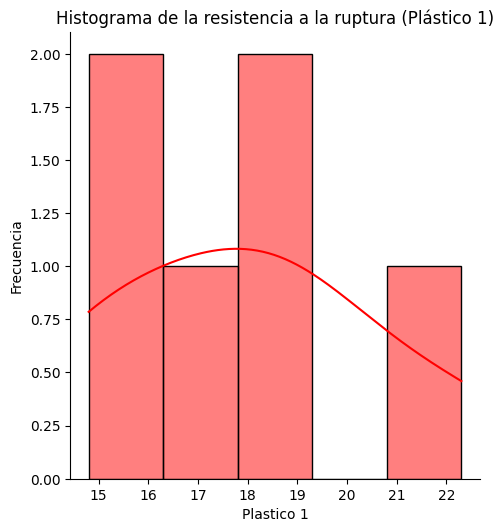

In [3]:
# Hagamos un histograma para cada uno

import matplotlib.pyplot as plt
import seaborn as sb

# bins es opcional. Es el numero de intervalos de clase
sb.displot(plastico1, color='red', bins=5, kde=True) #dibujamos una "curva de probabilidad"
plt.ylabel('Frecuencia')
plt.xlabel('Plastico 1')
plt.title('Histograma de la resistencia a la ruptura (Plástico 1)')
plt.show()

In [4]:
# Hagamos un diagrama de caja-brazos
import plotly.express as px

fig = px.box(plastico1, points="all")  # se muestra la distribucion de las observaciones junto a la caja
fig.show()

fig = px.box(plastico1, points="outliers")  # se muestra la distribucion de las observaciones junto a la caja
#fig.show()

In [5]:
# Otra forma:

df = pd.DataFrame({"Plastico 1": plastico1, "Plastico 2": plastico2})
fig = px.box(df,points="all")  # se muestra la distribucion de las observaciones junto a la caja
fig.show()

In [6]:
# Las graficas muestran una diferencia notable. Veamos que nos dice el intervalo de confianza.

# Creamos un intervalo de confianza del 90% para cada variable (nosotros fijamos la
# confianza en este ejercicio porque no se nos indica)

# NOTA: ESTAMOS SUPONIENDO QUE:
# 1. CADA MUESTRA DE PLASTICO PROVIENE DE UNA DISTRIBUCION NORMAL CON MEDIA MU Y VARIANZA
# POBLACIONAL SIGMA^2 DESCONOCIDA.
# 2. EL INTERVALO SE ESTIMA PARA EL PROMEDIO DE LA VARIABLE.

# De acuerdo con lo anterior, debemos usar un intervalo basado en "t".
# Recordemos que en el caso del promedio tenemos dos opciones: intervalo basado en Z e
# intervalo basado en t.

print(st.t.interval(alpha=0.90, df=len(df) - 1,
              loc=np.mean(df),
              scale=st.sem(df)))

# INTERPRETACION:
# Plastico 1: nos dice que la resistencia PROMEDIO para el plastico 1 esta entre 15.70 y 17.87 con una confianza (seguridad) del 90%.
# Plastico 2: nos dice que la resistencia PROMEDIO para el plastico 1 esta entre 20.23 y 24.13 con una confianza (seguridad) del 90%.

(array([15.70258747, 17.8722364 ]), array([20.23074586, 24.1277636 ]))


In [7]:
# En realidad, nos interesa la comparacion entre ambos tipos de plastico para decidir cual
# es el mejor contra la ruptura.

# ESTAMOS CONSIDERANDO LO MISMO QUE EN EL CASO INDIVIDUAL Y AGREGAMOS EL HECHO DE QUE
# LAS MUESTRAS SON INDEPENDIENTES (PAIRED=FALSE)

import pingouin as pg
ic = pg.ttest(plastico1, plastico2, paired=False, confidence=0.90)
print(ic.columns)  # checar nombres del objeto ic
print(ic["CI90%"])   # solo interesa el intervalo

# La diferencia entre la resistencia promedio del plastico 1 y la resistencia promedio del plastico 2 esta,
# con una confianza del 90% entre -6.51 y 0.44. Como pasa por el cero, se concluye que estadisticamente no hay
# diferencia entre estos materiales, asi que da lo mismo usar cualquiera de ellos. ¿Por que no coincide con lo de la
# grafica de caja-brazos?

# No coincide con lo observado en la grafica de caja y brazos porque los "supuestos"
# son fuertes y es casi seguro que no se cumplen. Aun asi, es lo que podemos hacer y con
# ello debemos tomar decisiones.

Index(['T', 'dof', 'alternative', 'p-val', 'CI90%', 'cohen-d', 'BF10',
       'power'],
      dtype='object')
T-test    [-6.506350214645433, 0.43968354797877046]
Name: CI90%, dtype: object
